Continue to modify figures.

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
plt.style.use('seaborn-paper')
#plt.style.use('seaborn-colorblind')
#plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = True


%matplotlib inline

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Add confidence interval to the prediction
The confidence intervals (95%) are adopted from the test set in `build_models_10.ipynb`.

In [3]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20210825.csv', index_col=0)
predict_df = pd.read_csv('results/predict_20220104.csv', index_col=0)

20220331


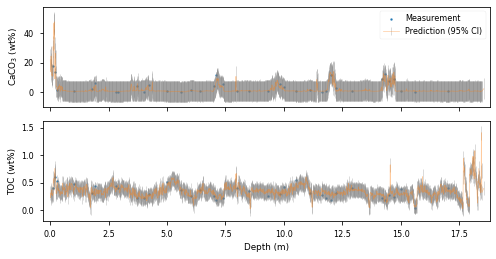

In [23]:
core = 'SO264-64-1'
fig, axes = plt.subplots(2, 1, figsize=(7, 3.7), sharex='col')

X = predict_df[predict_df.core == core]

for ax, measurement, conf_int in zip(axes, ['CaCO3', 'TOC'], [[7.00, 7.04], [0.13, 0.13]]):
    ax.errorbar(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)], 
        yerr = [np.repeat(conf_int[0], len(X)), np.repeat(conf_int[1], len(X))],
        label='Prediction (95% CI)', alpha=.4, ecolor='grey', linewidth=.7, c='C1')

    ax.scatter(
        merge_df.loc[merge_df.core == core, 'mid_depth_mm']*.001, 
        merge_df.loc[merge_df.core == core, '{}%'.format(measurement)], 
        label='Measurement', s=4)

    if measurement == 'CaCO3':
        ax.set_ylabel('CaCO$_3$ (wt%)')
        ax.set_xlim(-.3, 18.8)
        ax.legend()
    else:
        ax.set_ylabel('TOC (wt%)')
        ax.set_xlabel('Depth (m)')

fig.subplots_adjust(hspace=.08)
fig.tight_layout()
fig.savefig('results/prediction_{}_{}.png'.format(core, date))
print(date)

How about just use the case study to show the resolution difference and CI in the same time? Also, use RMSE instead of R2.

20220331


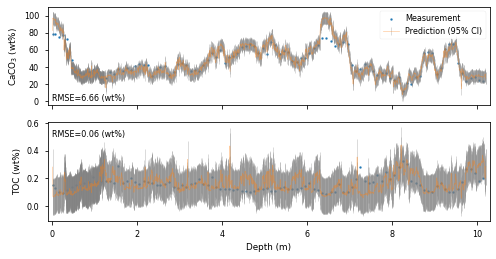

In [36]:
core = 'PS75-056-1'
fig, axes = plt.subplots(2, 1, figsize=(7, 3.7), sharex='col')

X = predict_df[predict_df.core == core]

for ax, measurement, conf_int in zip(axes, ['CaCO3', 'TOC'], [[7.00, 7.04], [0.13, 0.13]]):
    ax.errorbar(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)], 
        yerr = [np.repeat(conf_int[0], len(X)), np.repeat(conf_int[1], len(X))],
        label='Prediction (95% CI)', alpha=.4, ecolor='grey', linewidth=.7, c='C1')

    ax.scatter(
        merge_df.loc[merge_df.core == core, 'mid_depth_mm']*.001, 
        merge_df.loc[merge_df.core == core, '{}%'.format(measurement)], 
        label='Measurement', s=4)

    if measurement == 'CaCO3':
        ax.set_ylabel('CaCO$_3$ (wt%)')
        ax.set_xlim(-.1, 10.3)
        ax.text(0, 0, 'RMSE=6.66 (wt%)', fontsize=8)
        ax.legend()
    else:
        ax.set_ylabel('TOC (wt%)')
        ax.set_xlabel('Depth (m)')
        ax.text(0, .5, 'RMSE=0.06 (wt%)', fontsize=8)

fig.subplots_adjust(hspace=.08)
fig.tight_layout()
fig.savefig('results/prediction_{}_{}.png'.format(core, date))
print(date)

# Put figures together

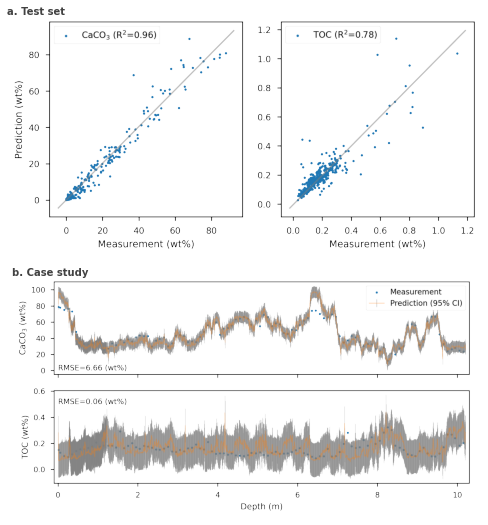

In [51]:
imgs = [plt.imread('results/performance_dev_20220209.png'), plt.imread('results/prediction_PS75-056-1_20220331.png')]

# the size is sum from the size of these two figures
fig, axes = plt.subplots(2, 1, figsize=(7, 7.4))
for ax, img, cap in zip(axes, imgs, ['a. Test set', 'b. Case study']):
    ax.axis('off')
    ax.imshow(img)
    ax.text(0, 1, cap, weight='bold', c='#424242')

#fig.subplots_adjust(hspace=.01)
fig.tight_layout()
fig.savefig('results/join_figure_0_{}.png'.format(date))


# Draw predictions in training set

In [3]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20220629.csv', index_col=0)
predict_df = pd.read_csv('results/predict_20220629.csv', index_col=0)
area_df = pd.read_csv('data/CaBr_20220701.csv', index_col=0)

20220701


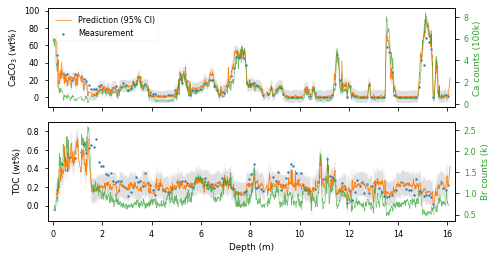

In [15]:
core = 'SO264-55-1'
fig, axes = plt.subplots(2, 1, figsize=(7, 3.7), sharex='col')

X = predict_df[predict_df.core == core]
aa = area_df[area_df.core == core]

for ax, measurement, conf_int in zip(axes, ['CaCO3', 'TOC'], [[7.00, 7.04], [0.13, 0.13]]):
    ax.errorbar(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)], 
        yerr = [np.repeat(conf_int[0], len(X)), np.repeat(conf_int[1], len(X))],
        alpha=.6, ecolor='grey', linewidth=.1, c='C1')

    ax.scatter(
        merge_df.loc[merge_df.core == core, 'mid_depth_mm']*.001, 
        merge_df.loc[merge_df.core == core, '{}%'.format(measurement)], 
        label='Measurement', s=4)
        
    ax.plot(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)],
        linewidth=.7, c='C1', label='Prediction (95% CI)')
    
    ax2 = ax.twinx()
    
    if measurement == 'CaCO3':
        ax.set_ylabel('CaCO$_3$ (wt%)')
        ax.set_xlim(-.2, 16.3)
        ax.legend(loc='upper left')
        ax2.plot(aa.depth_cm*.01, aa.Ca_Area*.00001, c='C2', lw=.6, alpha=.7, label='Ca area')
        ax2.set_ylabel('Ca counts (100k)', c='C2')
        ax2.tick_params(axis='y', labelcolor='C2')
        #ax2.legend(loc='upper right')
    else:
        ax.set_ylabel('TOC (wt%)')
        ax.set_xlabel('Depth (m)')
        ax2.plot(aa.depth_cm*.01, aa.Br_Area*.001, c='C2', lw=.6, alpha=.7, label='Br area')
        ax2.set_ylabel('Br counts (k)', c='C2')
        ax2.tick_params(axis='y', labelcolor='C2')
        #ax2.legend(loc='upper right')
       

fig.subplots_adjust(hspace=.08)
fig.tight_layout()
fig.savefig('results/prediction_{}_{}.png'.format(core, date))
print(date)

# Draw case study cores

20220701


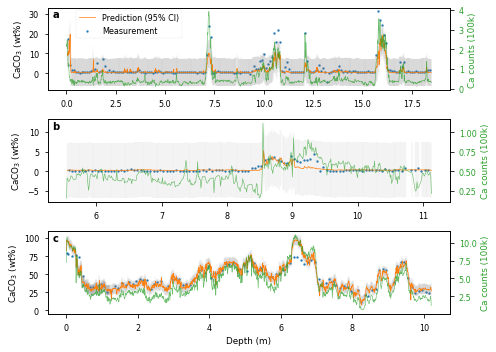

In [29]:
cores = ['SO264-69-2', 'LV28-44-3-n', 'PS75-056-1']
measurement = 'CaCO3'
conf_int = [7.00, 7.04]

fig, axes = plt.subplots(3, 1, figsize=(7, 5))

for core, ax, no in zip(cores, axes, ['a', 'b', 'c']):
    X = predict_df[predict_df.core == core]
    aa = area_df[area_df.core == core]

    ax.errorbar(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)], 
        yerr = [np.repeat(conf_int[0], len(X)), np.repeat(conf_int[1], len(X))],
        alpha=.6, ecolor='grey', linewidth=.1, c='C1')

    ax.scatter(
        merge_df.loc[merge_df.core == core, 'mid_depth_mm']*.001, 
        merge_df.loc[merge_df.core == core, '{}%'.format(measurement)], 
        label='Measurement', s=4)
        
    ax.plot(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)],
        linewidth=.7, c='C1', label='Prediction (95% CI)')

    ax.set_ylabel('CaCO$_3$ (wt%)')
    #ax.set_xlim(-.3, 18.8)
    ax.text(
        .01, .88, no, 
        fontweight = 'bold', transform=ax.transAxes
    )
        
    ax2 = ax.twinx()
    ax2.plot(aa.depth_cm*.01, aa.Ca_Area*.00001, c='C2', lw=.6, alpha=.7)
    ax2.set_ylabel('Ca counts (100k)', c='C2')
    ax2.tick_params(axis='y', labelcolor='C2')
    #ax2.legend(loc='upper right')

    axes[0].legend(loc=(.07, .63))
    axes[2].set_xlabel('Depth (m)')
fig.subplots_adjust(hspace=.08)
fig.tight_layout()
fig.savefig('results/prediction_casestudies_{}_{}.png'.format(measurement, date))
print(date)

20220701


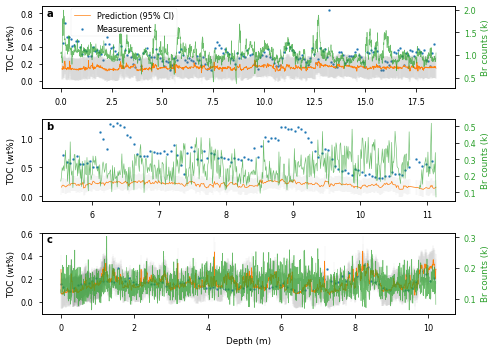

In [31]:
cores = ['SO264-69-2', 'LV28-44-3-n', 'PS75-056-1']
measurement = 'TOC'
conf_int = [0.13, 0.13]

fig, axes = plt.subplots(3, 1, figsize=(7, 5))

for core, ax, no in zip(cores, axes, ['a', 'b', 'c']):
    X = predict_df[predict_df.core == core]
    aa = area_df[area_df.core == core]

    ax.errorbar(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)], 
        yerr = [np.repeat(conf_int[0], len(X)), np.repeat(conf_int[1], len(X))],
        alpha=.6, ecolor='grey', linewidth=.1, c='C1')

    ax.scatter(
        merge_df.loc[merge_df.core == core, 'mid_depth_mm']*.001, 
        merge_df.loc[merge_df.core == core, '{}%'.format(measurement)], 
        label='Measurement', s=4)
        
    ax.plot(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)],
        linewidth=.7, c='C1', label='Prediction (95% CI)')

    ax.set_ylabel('TOC (wt%)')
    ax.text(
        .01, .88, no, 
        fontweight = 'bold', transform=ax.transAxes
    )
        
    ax2 = ax.twinx()
    ax2.plot(aa.depth_cm*.01, aa.Br_Area*.001, c='C2', lw=.6, alpha=.7)
    ax2.set_ylabel('Br counts (k)', c='C2')
    ax2.tick_params(axis='y', labelcolor='C2')

    axes[0].legend(loc=(.07, .63))
    axes[2].set_xlabel('Depth (m)')
fig.subplots_adjust(hspace=.08)
fig.tight_layout()
fig.savefig('results/prediction_casestudies_{}_{}.png'.format(measurement, date))
print(date)

 # Data distribution
 It's modified from `build_models_08.ipynb` and adopt the case study codes from `build_models_09.ipynb`.

In [1]:
from nwp_cali import PrepareData
from sklearn.model_selection import train_test_split

y_train = {}
y_dev = {} 
core_train = {} 
core_dev = {}

for measurement in ['CaCO3%', 'TOC%']:
    print(measurement)
    prepare = PrepareData(measurement=measurement)
    data_df = prepare.select_data()
    y_train[measurement], y_dev[measurement], core_train[measurement], core_dev[measurement] = train_test_split(data_df[measurement], data_df.core, test_size = 0.2, shuffle = True, random_state = 24)
    print(len(y_train[measurement]), len(y_dev[measurement]))

CaCO3%
1488 372
TOC%
1573 394


In [5]:
case_df = pd.read_csv('results/predictions_casestudies_20220702.csv', index_col=0)

In [6]:
(~case_df['TOC%'].isna()).sum()

293

20220702


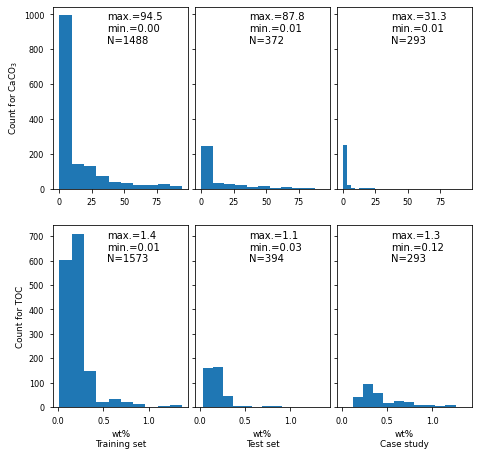

In [9]:
fig, axes = plt.subplots(2, 3, sharex='row', sharey='row', figsize=(7.5, 7))

# Here the dev set is marked as Test set on the figure due to the simplification
# in the paper    
for ax, y, label in zip(axes[0, :], [y_train['CaCO3%'], y_dev['CaCO3%'], case_df['CaCO3%']], 
                                    ['Training set', 'Test set', 'Case study']):    
    ax.hist(y)
    ax.text(0.4, 0.8, "max.={:.1f}\nmin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)

for ax, y, label in zip(axes[1, :], [y_train['TOC%'], y_dev['TOC%'], case_df['TOC%']], 
                                    ['Training set', 'Test set', 'Case study']):
    ax.hist(y)
    ax.text(.4, .8, "max.={:.1f}\nmin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)
    

    ax.set_xlabel('wt%\n{}'.format(label))

axes[0, 0].set_ylabel('Count for CaCO$_3$')
axes[1, 0].set_ylabel('Count for TOC')


fig.subplots_adjust(wspace=.05, top=.92)
fig.savefig('results/data_hist_{}.png'.format(date))
print(date)